<div style="color: red; font-size: 30px; text-align: center; font-weight: bold;">
    Loan Approval Prediction
</div>

Objective :

The objective of this project is to develop a machine learning model that can accurately predict whether a loan application will be approved or rejected based on various applicant attributes and financial indicators. This model will assist financial institutions in automating the loan approval process, thereby improving efficiency, reducing manual effort, and minimizing the risk of biased decision-making.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('loan_prediction.csv')

In [4]:
df

,Loan_id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Loan_id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.columns

Index(['Loan_id', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Our dataset has 13 columns.

1. Loan_id

2. Gender : Tells about gender is male or female.

3. Married : Tells about person is married or not.

4. Dependents : Number of dependents (such as children or other financially dependent individuals) that the loan applicant has.

5. Education : Refers to the level of education attained by the loan applicant.

6. Self_Employed : Refers to whether the loan applicant is self-employed or not.

7. Applicant Income :  Refers to the income of the loan applicant.

8. Coapplicant Income : Refers to the combined income of the loan applicant and their co-applicant or co-borrower.

9. Loan Amount : Refers to the amount of money that the loan applicant is requesting to borrow from the lender.

10. Loan Amount Term :Rrefers to the duration or term of the loan requested by the applicant.

11. Credit History : Rfers to the credit history of the loan applicant.

12. Property Area : Rfers to the location or area where the property for which the loan is being sought is situated.

13. Loan Status : Refers to the outcome or status of the loan application, indicating whether the loan was approved or denied.

In [46]:
df.shape

(614, 13)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_id            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [49]:
# categorical columns

df.select_dtypes(include='object').columns.tolist()

['Loan_id',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [50]:
# Numeric columns

df.select_dtypes(exclude='object').columns.tolist()

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

***********

In this dataset, the 'loan_id' column shows a unique identifier for each loan application. While the 'loan_id' column is essential for tracking individual loan applications, it usually does not provide any predictive value for the loan approval outcome. So we will drop 'loan_id' column 

In [51]:
df=df.drop('Loan_id', axis=1)

In [52]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


*************

Now let’s see that if the data has missing values or not

In [55]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Our dataset has missing values in some categorical columns and some numerical columns. Now let's fill these missing values

Filling missing values in categorical columns :

In categorical columns, we can fill in missing values with the mode of each column. The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data:

In [56]:
# Fill missing values in categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

*******

Filling missing values in Numerical Columns :

1. We can fill in the missing values of the loan amount column with the median value. The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data;
2. We can fill in the missing values of the loan amount term column with the mode value of the column. Since the term of the loan amount is a discrete value, the mode is an appropriate metric to use;
3. We can fill in the missing values of the credit history column with the mode value. Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values.

In [57]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill missing values in Credit_History with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [60]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

1. let’s see the distribution of the loan status column:

In [63]:
import plotly.express as px

loan_status_count = df['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count,
                         names=loan_status_count.index,
                         title='Loan Approval Status')
fig_loan_status.show()

2. Distribution of the gender column :

In [64]:
import plotly.express as px

Gender_count = df['Gender'].value_counts()

fig_loan_status = px.bar(Gender_count,  
                         title='Gender Count')

fig_loan_status.show()

3. Distribution of the martial status column:

In [70]:
married_count = df['Married'].value_counts()

fig_married = px.bar(married_count,
                     title='Marital Status Distribution')
fig_married.show()

4. Distribution of the education column

In [71]:
education_count = df['Education'].value_counts()

fig_education = px.bar(education_count,  
                       title='Education Distribution')
fig_education.show()

5 Distribution of the self-employment column:

In [72]:
self_employed_count = df['Self_Employed'].value_counts()

fig_self_employed = px.bar(self_employed_count,  
                           title='Self-Employment Distribution')
fig_self_employed.show()

6. Distribution of the Applicant Income column:

In [68]:
fig_applicant_income = px.histogram(df, x='ApplicantIncome', 
                                    title='Applicant Income Distribution')
fig_applicant_income.show()

****************

Now let's see relationship between variables.

1. Relationship between the income of the loan applicant and the loan status:

In [73]:
fig_income = px.box(df, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In our dataset, the “ApplicantIncome” column contains outliers. We have to remove those outliers before moving forward

In [74]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

In [76]:
fig_income = px.box(df, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [77]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

In [78]:
fig_income = px.box(df, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [79]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

In [80]:
fig_income = px.box(df, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

*************

2. Relationship between the income of the loan co-applicant and the loan status:

In [81]:
fig_coapplicant_income = px.box(df, 
                                x='Loan_Status', 
                                y='CoapplicantIncome',
                                color="Loan_Status", 
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [82]:
# Calculate the IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

In [83]:
fig_coapplicant_income = px.box(df, 
                                x='Loan_Status', 
                                y='CoapplicantIncome',
                                color="Loan_Status", 
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

*************

3. Relationship between the loan amount and the loan status:

In [84]:
fig_loan_amount = px.box(df, x='Loan_Status', 
                         y='LoanAmount', 
                         color="Loan_Status",
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

In [85]:
# Calculate the IQR
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

In [86]:
fig_loan_amount = px.box(df, x='Loan_Status', 
                         y='LoanAmount', 
                         color="Loan_Status",
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

In [87]:
# Calculate the IQR
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

In [90]:
fig_loan_amount = px.box(df, x='Loan_Status', 
                         y='LoanAmount', 
                         color="Loan_Status",
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

In [89]:
# Calculate the IQR
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

In [91]:
fig_loan_amount = px.box(df, x='Loan_Status', 
                         y='LoanAmount', 
                         color="Loan_Status",
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

In [92]:
# Calculate the IQR
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

In [93]:
fig_loan_amount = px.box(df, x='Loan_Status', 
                         y='LoanAmount', 
                         color="Loan_Status",
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

**********

4. Relationship between credit history and loan status:

In [94]:
fig_credit_history = px.histogram(df, x='Credit_History', color='Loan_Status', 
                                  barmode='group',
                                  title='Loan_Status vs Credit_His')
fig_credit_history.show()

*************

5. Relationship between the property area and the loan status:

In [95]:
fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status', 
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

*****************

# Data Preparation and Training Loan Approval Prediction Model

In this step, we will:

1. convert categorical columns into numerical ones 
2. split the data into training and test sets
3. scale the numerical features; train the loan approval prediction model.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [97]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=cat_cols)

In [98]:
# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

1. Logistic Regrression

In [108]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

# Train the model on the training data
model_lr.fit(X_train, y_train)

# Predict the target labels for the test data
y_pred_lr = model_lr.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8105263157894737
              precision    recall  f1-score   support

           N       0.90      0.35      0.50        26
           Y       0.80      0.99      0.88        69

    accuracy                           0.81        95
   macro avg       0.85      0.67      0.69        95
weighted avg       0.83      0.81      0.78        95



In [110]:
accuracy_percent = accuracy * 100

print("Accuracy:", accuracy_percent, "%")

Accuracy: 81.05263157894737 %


**********

2. DecisionTreeClassifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier model
model_dt = DecisionTreeClassifier()

# Train the model on the training data
model_dt.fit(X_train, y_train)

# Predict the target labels for the test data
y_pred_dt = model_dt.predict(X_test)

In [113]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.7157894736842105
              precision    recall  f1-score   support

           N       0.48      0.50      0.49        26
           Y       0.81      0.80      0.80        69

    accuracy                           0.72        95
   macro avg       0.65      0.65      0.65        95
weighted avg       0.72      0.72      0.72        95



In [114]:
accuracy_percent = accuracy * 100

print("Accuracy:", accuracy_percent, "%")

Accuracy: 71.57894736842105 %


Accracy of Logistic Regression model is 81% and accuracy of Decision tree is 71%. So we will select logistic regression model for our project.

*****

# Final check

Now let’s classify whether a loan is approved or not by feeding values into the model:

In [111]:
Loan_Approved_or_not = model_lr.predict([[6000, 3000, 100, 360,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0]])
print('Loan Approved or not =', Loan_Approved_or_not)

Loan Approved or not = ['Y']


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



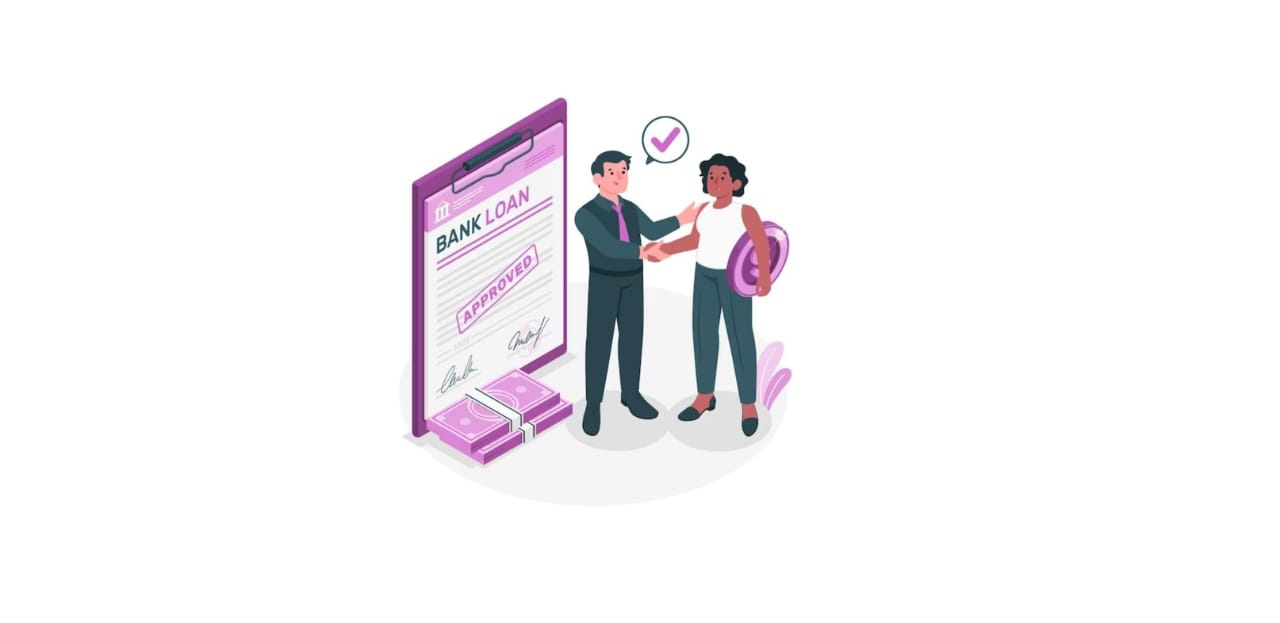

Summary: 

The loan approval using machine learning project represents a strategic investment for financial institutions seeking to modernize and optimize their lending operations. By harnessing the power of data and advanced analytics, these institutions can make more informed decisions, manage risk more effectively, and ultimately provide better financial services to their customers.

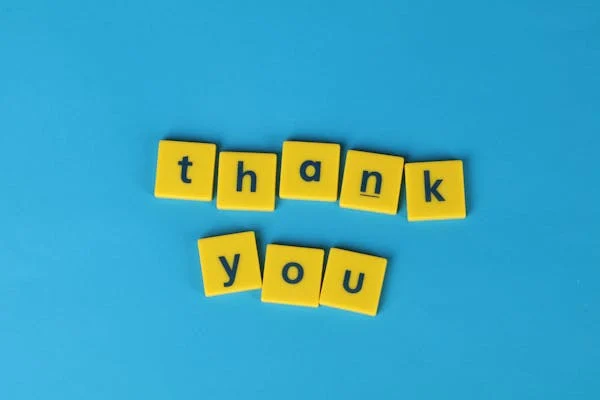